# Example: Multiclass classification
------------------------------------

This example shows how to compare the performance of three models on a multiclass classification task.

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset). This is a small and easy to train dataset whose goal is to predict wines into three groups (which cultivator it's from) using features based on the results of chemical analysis.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_wine
from atom import ATOMClassifier

In [2]:
# Load data
X, y = load_wine(return_X_y=True, as_frame=True)

# Let's have a look
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=-1, verbose=2, random_state=1)

# Fit the pipeline with the selected models
atom.run(
    models=["LR","LDA", "RF"],
    metric="roc_auc_ovr",
    n_trials=4,
    n_initial_points=3,
    ht_params={"base_estimator": "rf", "max_time": 100},
    n_bootstrap=5,
)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.
Parallel processing with 16 cores.

Dataset stats ==================== >>
Shape: (178, 14)
Memory: 19.35 kB
Scaled: False
Outlier values: 9 (0.4%)
-------------------------------------
Train set size: 143
Test set size: 35
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   59 (1.2) |   47 (1.2) |   12 (1.3) |
| 1 |   71 (1.5) |   57 (1.5) |   14 (1.6) |
| 2 |   48 (1.0) |   39 (1.0) |    9 (1.0) |


Training ========================= >>
Models: LR, LDA, RF
Metric: roc_auc_ovr


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio | roc_auc_ovr | best_roc_auc_ovr |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ----------- | ---------------- | ------- | ---------- |
| Initial point 1  |    none |     --- |   l

## Analyze the results

In [4]:
atom.results

,metric_bo,time_bo,score_train,score_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LR,1.0,2.880s,1.0,1.000000,0.328s,0.999773,0.000454,1.781s,4.989s
LDA,1.0,0.531s,1.0,1.000000,0.016s,1.000000,0.000000,0.031s,0.578s
RF,1.0,2.110s,1.0,0.998792,0.359s,0.998822,0.000741,1.563s,4.032s


In [5]:
# Show the score for some different metrics
atom.evaluate(["precision_macro", "recall_macro", "jaccard_weighted"])

,precision_macro,recall_macro,jaccard_weighted
LR,0.966667,0.97619,0.945714
LDA,1.000000,1.00000,1.000000
RF,0.974359,0.97619,0.945055


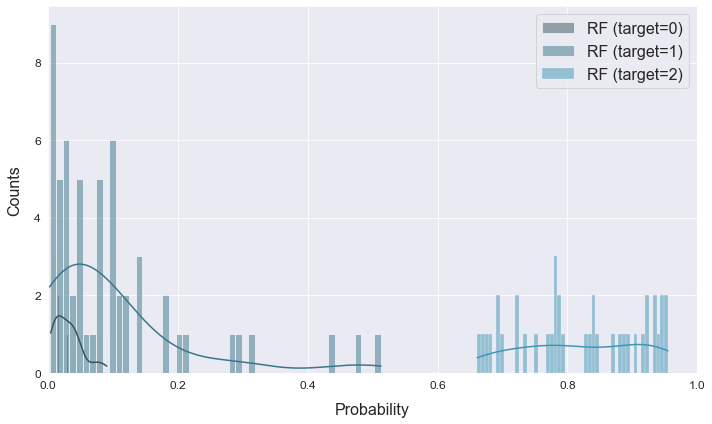

In [6]:
# Some plots allow you to choose the target class to look at
atom.rf.plot_probabilities(dataset="train", target=2)

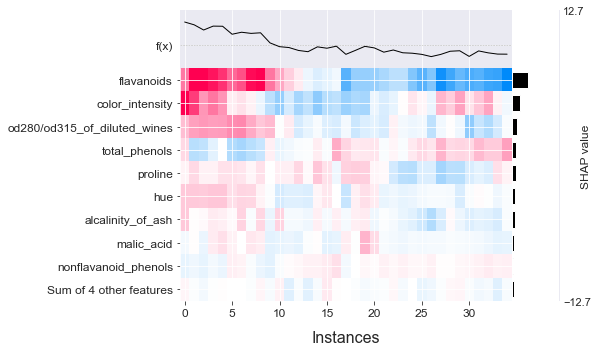

In [7]:
atom.lda.heatmap_plot(target=2, show=10, figsize=(8, 5))
